### Prediction of honored Hotel Reservations using Support Vector Classifier

In this notebook we will be analysing hotel bookings and reservation. We will focus on finding out using how customer information can help us determine whether a client will honor their booking or not. After the analysis we will create a simple ML model predicting the cahances of canceling or honoring a hotel booking. The data we will use is downloaded from kaggle: https://www.kaggle.com/jessemostipak/hotel-booking-demand

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

In [2]:
data = pd.read_csv("D:\Python Lessons\CSVs\hotel_bookings.csv\hotel_bookings.csv")

In [3]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
data.shape

(119390, 32)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
data.describe(include = "all")

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


Based on the .describe analysis, the following columns need some more analysis:
* Lead_time: Max value (737) is way higher than the rest so could be an outlier
* adr: also has a max (5400) which could also be an outlier

In [7]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

#### Checking Columns with Null Values

In [8]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

We will drop the columns that have missing countries because there is no way to relate them to another country

In [9]:
data["country"].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
PLW        1
NPL        1
MDG        1
BHS        1
NCL        1
Name: country, Length: 177, dtype: int64

In [10]:
data = data[data["country"].notna()]

In [11]:
data.shape

(118902, 32)

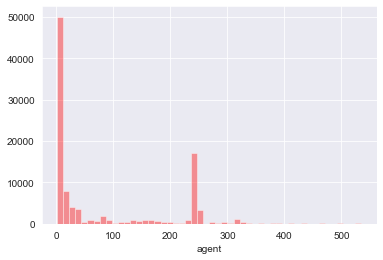

In [12]:
sns.distplot(data["agent"], kde = False, color = "r")

In [13]:
data[data["agent"].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,...,No Deposit,NaN,110.0,0,Transient,107.42,0,0,Check-Out,2015-07-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119124,City Hotel,0,0,2017,August,35,29,0,1,1,...,No Deposit,NaN,72.0,0,Transient,0.00,0,2,Check-Out,2017-08-30
119151,City Hotel,0,0,2017,August,35,29,0,1,2,...,No Deposit,NaN,NaN,0,Transient,270.00,0,0,Check-Out,2017-08-30
119166,City Hotel,0,0,2017,August,35,30,0,1,1,...,No Deposit,NaN,NaN,0,Transient,140.00,0,0,Check-Out,2017-08-31
119215,City Hotel,0,2,2017,August,35,31,0,1,1,...,No Deposit,NaN,NaN,0,Transient,140.00,0,2,Check-Out,2017-09-01


It's hard to tell the special thing about agent for now, but there are many hotel booking agents through between 1 and 10, some of them even made up more than 10,000 bookings

In [14]:
correlations = data.corr()
correlations = correlations["agent"]

In [15]:
correlations

is_canceled                      -0.081954
lead_time                        -0.068739
arrival_date_year                 0.063704
arrival_date_week_number         -0.030998
arrival_date_day_of_month         0.001741
stays_in_weekend_nights           0.141384
stays_in_week_nights              0.183272
adults                           -0.034492
children                          0.041242
babies                            0.036339
is_repeated_guest                 0.031626
previous_cancellations           -0.012381
previous_bookings_not_canceled    0.021781
booking_changes                   0.067088
agent                             1.000000
company                           0.350746
days_in_waiting_list             -0.055035
adr                              -0.023754
required_car_parking_spaces       0.176877
total_of_special_requests         0.033870
Name: agent, dtype: float64

* Agent column has very low correlations with most of the data, only company has a significant correlation with agent yet it has very many Nans. Most of these agents belong to companies belong which could be the reason for the significant correlation. But for the rest of the data with Nulls we decided to drop the rows because we didnt have info to generate and fill the columns.
* We also droped the comapny column because it has too many null values
* We filled the null values in the children column with the median value after masked values greater or equal to one child, which gave us a clean dataset

In [16]:
data = data[data["agent"].notna()]

In [17]:
data = data.drop(columns = "company", axis = 1)

In [18]:
data[data["children"] >=1]["children"].describe()

count    7893.000000
mean        1.450019
std         0.520917
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        10.000000
Name: children, dtype: float64

In [19]:
data["children"].fillna(1, inplace = True)

In [20]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

#### Exploring Columns

From the data we have, we identified the is cancelled column and reservation columns as the possile target columns in the datasets.  Aswe explored for the outliers and special features and unique values in the dataset, we also plotted most of the data against the two targets, however most were done against the is cancelled column.

##### Hotel

In [21]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [22]:
data["hotel"].value_counts()

City Hotel      71183
Resort Hotel    31713
Name: hotel, dtype: int64

In [23]:
data.groupby(["hotel", "country"]).mean()

is_canceled   lead_time  arrival_date_year  \
hotel        country                                               
City Hotel   ABW         0.000000  126.000000        2016.500000   
             AGO         0.765873   29.250000        2016.293651   
             AIA         0.000000    0.000000        2016.000000   
             ALB         0.142857  101.571429        2016.428571   
             AND         1.000000   20.000000        2016.500000   
...                           ...         ...                ...   
Resort Hotel VEN         0.333333   17.000000        2015.666667   
             VNM         0.000000  115.500000        2016.500000   
             ZAF         0.277778   81.944444        2016.444444   
             ZMB         0.000000   96.000000        2015.000000   
             ZWE         0.000000   20.000000        2016.000000   

                      arrival_date_week_number  arrival_date_day_of_month  \
hotel        country                                                        
City Hotel   ABW                     22.500000                  16.000000   
             AGO                     20.448413                  15.615079   
             AIA                     28.000000                   8.000000   
             ALB                     18.714286                  16.714286   
             AND                      9.000000                  12.000000   
...                                        ...                        ...   
Resort Hotel VEN                     36.333333                  14.666667   
             VNM                     29.000000                  16.000000   
             ZAF                     30.500000                  13.944444   
             ZMB                     43.000000                  24.000000   
             ZWE                     26.500000                  15.000000   

                      stays_in_weekend_nights  stays_in_week_nights    adults  \
hotel        country                                                            
City Hotel   ABW                     1.000000              2.500000  2.500000   
             AGO                     2.869048              7.103175  1.559524   
             AIA                     2.000000              2.000000  2.000000   
             ALB                     0.571429              2.857143  1.857143   
             AND                     1.000000              1.000000  2.000000   
...                                       ...                   ...       ...   
Resort Hotel VEN                     1.333333              2.666667  2.333333   
             VNM                     0.500000              2.000000  2.000000   
             ZAF                     0.944444              2.666667  1.944444   
             ZMB                     2.000000              4.000000  2.000000   
             ZWE                     0.500000              2.000000  2.000000   

                      children    babies  is_repeated_guest  \
hotel        country                                          
City Hotel   ABW      0.000000  0.000000           0.000000   
             AGO      0.269841  0.003968           0.027778   
             AIA      2.000000  0.000000           0.000000   
             ALB      0.000000  0.000000           0.000000   
             AND      0.000000  0.000000           0.000000   
...                        ...       ...                ...   
Resort Hotel VEN      0.333333  0.000000           0.000000   
             VNM      0.000000  0.000000           0.000000   
             ZAF      0.388889  0.000000           0.000000   
             ZMB      2.000000  0.000000           0.000000   
             ZWE      0.000000  0.000000           0.000000   

                      previous_cancellations  previous_bookings_not_canceled  \
hotel        country                                                           
City Hotel   ABW                    0.000000                        0.000000   
             AGO     

* Resort hotel has visitors from only five countries (VEN, VNM, ZAF, ZMB, ZWE) while the rest of the countries usually move into the City Hotel. 2016 wa the hot spot year for most of the bookings.
* The lead time for Resort hotel is shorter than that of the city hotel
* Resort hotel has more weekend stay ins and weekday stay ins. The resort hotel guests stay in for longer days than the those that go to the City hotel
* Many of the resort hotel visitors have children
* Resort hotel has more cancelations and changes compared to the city hotel yet the City hotelhas more guests
* Resort hotel guests require more special services than the rest

In [24]:
data.groupby("hotel").mean()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
hotel,,,,,,,,,,,,,,,,,,,
City Hotel,0.428178,116.829959,2016.168214,27.329685,15.834328,0.822725,2.233455,1.892250,0.095262,0.004538,0.010073,0.073234,0.013346,0.176896,28.147971,3.552070,106.724204,0.020848,0.566975
Resort Hotel,0.305364,100.308612,2016.131681,27.360735,15.679595,1.327121,3.389241,1.917163,0.147132,0.014789,0.022924,0.086148,0.049097,0.257623,217.619967,0.526346,100.087480,0.125280,0.691861


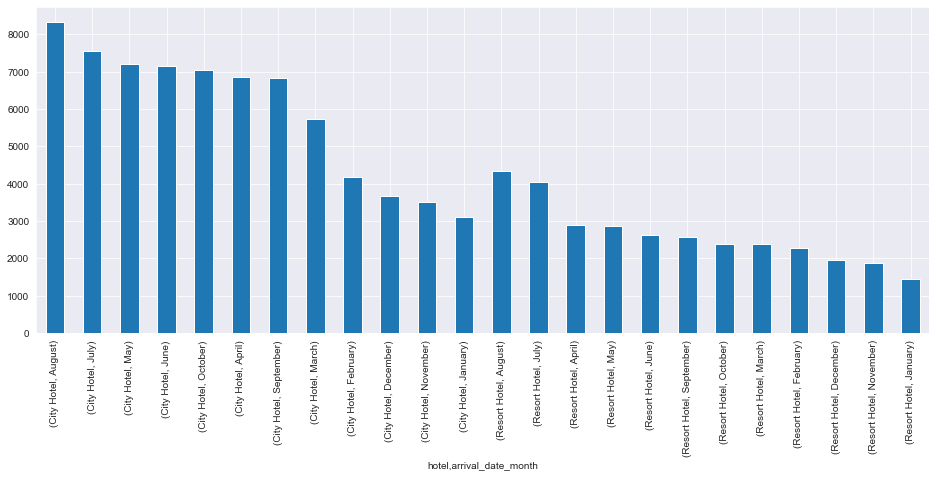

In [25]:
plt.figure(figsize = (16, 6))
data.groupby("hotel")["arrival_date_month"].value_counts().plot.bar()

* Resort Hotel has less guests, probably less than half those of the City Hotel in all months
* Most guests visit the hotels in the months of August and July, with the rise starting in April and May
* City Hotel had more cancelations than bookings

##### Target Column

Our target columns is the is cancelled and reservation status columns. We want to look at the data as per the cancelled column which we can plot for details as follows;

In [26]:
print(data["is_canceled"].value_counts())
print(data["reservation_status"].value_counts())

0    62733
1    40163
Name: is_canceled, dtype: int64
Check-Out    62733
Canceled     39160
No-Show       1003
Name: reservation_status, dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A6746C3B88>],
      dtype=object)

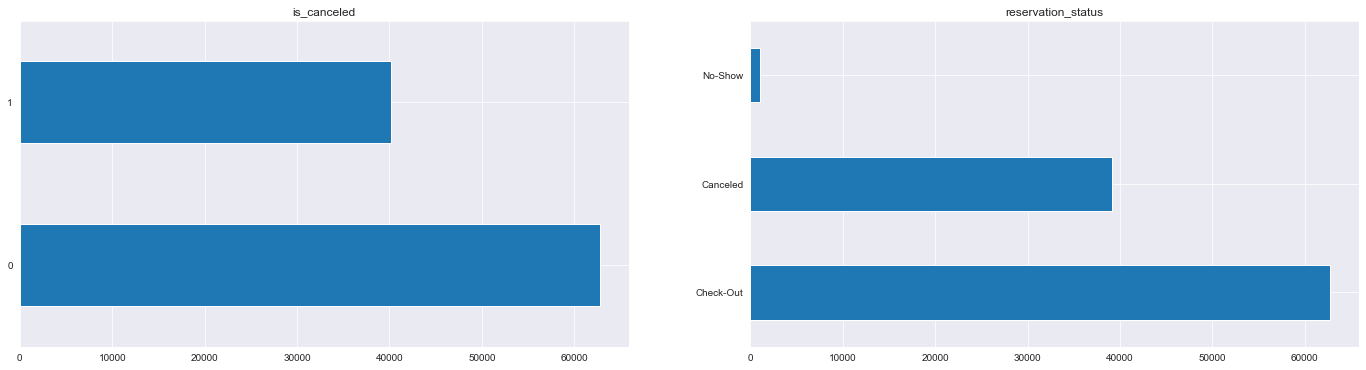

In [27]:
fig,axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches((24, 6))
data["is_canceled"].value_counts().plot.barh( ax = axes[0], subplots = True)
data["reservation_status"].value_counts().plot.barh(ax = axes[1], subplots = True)

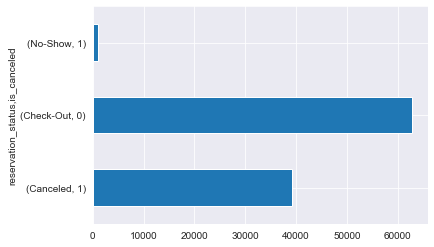

In [28]:
data.groupby("reservation_status")["is_canceled"].value_counts().plot.barh()

In [29]:
data[data["is_canceled"] == 0][["is_canceled", "reservation_status"]].describe(include = "all")

,is_canceled,reservation_status
count,62733.0,62733
unique,NaN,1
top,NaN,Check-Out
freq,NaN,62733
mean,0.0,NaN
std,0.0,NaN
min,0.0,NaN
25%,0.0,NaN
50%,0.0,NaN
75%,0.0,NaN


From the above analysis;
* is canceled column has two values (0, 1) representing(No and Yes) respectively:- No, booking was not canceled and Yes, booking was cancelled
* reservation status column has three values No Show: the customers that didn't cancel and didn't show up on their reservation date; Canceled: the customers that canceled their bookings; and Check Out: the customers that honored their bookings
* The total number of customers that honored their booking (No/0 for the is_cancel column) is equal to the total number of customers that checked out. They are actually the same people (62, 733)
* The people that canceled in the is canceled column make up the (No Show and Canceled) in the reservation status column

##### Date Columns

In [30]:
date_columns = ['lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month']

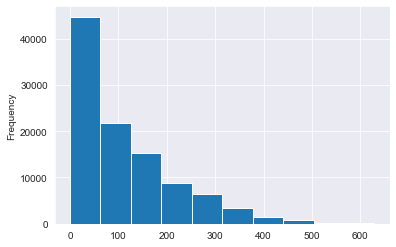

In [31]:
data["lead_time"].plot.hist()

In [32]:
list_1 = ["January","February", "March"]
list_2 = ["April", "May", "June"]
list_3 = ["July","August", "September"]
list_4 = ["October", "November", "December"]

def quarter(array):
    if array in list_1:
        return "Q1"
    elif array in list_2:
        return "Q2"
    elif array in list_3:
        return "Q3"
    elif array in list_4:
        return "Q4"

In [33]:
data["arrival_quarter"] = data["arrival_date_month"].apply(quarter)

In [34]:
data.groupby(["arrival_date_year", "arrival_quarter","arrival_date_month"])[["lead_time", "arrival_date_week_number", "arrival_date_day_of_month", "is_canceled"]].mean()

lead_time  \
arrival_date_year arrival_quarter arrival_date_month               
2015              Q3              August              110.923054   
                                  July                131.816836   
                                  September           128.044215   
                  Q4              December             59.015228   
                                  November             57.176566   
                                  October             108.578050   
2016              Q1              February             41.816213   
                                  January              40.362254   
                                  March                60.723352   
                  Q2              April                91.384330   
                                  June                124.888889   
                                  May                 125.878381   
                  Q3              August              126.581271   
                                  July                131.292876   
                                  September           154.692703   
                  Q4              December             98.895885   
                                  November             90.206546   
                                  October             146.287882   
2017              Q1              February             63.280753   
                                  January              62.365211   
                                  March                94.313324   
                  Q2              April               108.728962   
                                  June                143.220109   
                                  May                 123.202893   
                  Q3              August              143.575221   
                                  July                158.695724   

                                                      arrival_date_week_number  \
arrival_date_year arrival_quarter arrival_date_month                             
2015              Q3              August                             33.490009   
                                  July                               29.184723   
                                  September                          37.940387   
                  Q4              December                           50.958968   
                                  November                           46.643629   
                                  October                            41.957493   
2016              Q1              February                            7.902855   
                                  January                             3.388732   
                                  March                              12.128161   
                  Q2              April                              16.466392   
                                  June                               24.996502   
                                  May                                20.693717   
                  Q3              August                             33.808874   
                                  July                               29.396978   
                                  September                          38.250154   
                  Q4              December                           51.203010   
                                  November                           46.540350   
                                  October                            42.589038   
2017              Q1              February                            7.041789   
                                  January                             2.704439   
                                  March                              11.172767   
                  Q2              April                              15.584559   
                                  June                               24.116933   
                                  May                                19.804525   
                  

* The year 2016 had visitors check into the hotels for all months of the year, while 2015 had viistors for only 6 months and 2017 has only eight but more understandable probably because data was collected before the year had come to an end
* The lead times are higher for all years for months of May, June, July, August, September, October probably because vistors don't want to find the hotels overbooked. Quarter 3 had the highest lead times
* Dropping Columns: we will drop the <b>arrival_date_day_of_month</b> column because it shows almost the same date as most guest arrive on the 15-16th day of the month which is the middle of the month. ** We might also drop <b>arrival_date_week_number</b> or <b>arrival_date_month</b> they almost show the same information, the weeks are in months and months are more generalised so they make the work of modeling easier

In [35]:
data.groupby(["arrival_date_year", "arrival_quarter"])["lead_time"].mean()

arrival_date_year  arrival_quarter
2015               Q3                 123.483612
                   Q4                  83.236516
2016               Q1                  50.137195
                   Q2                 113.930788
                   Q3                 137.979376
                   Q4                 117.044065
2017               Q1                  75.420084
                   Q2                 125.046550
                   Q3                 151.319364
Name: lead_time, dtype: float64

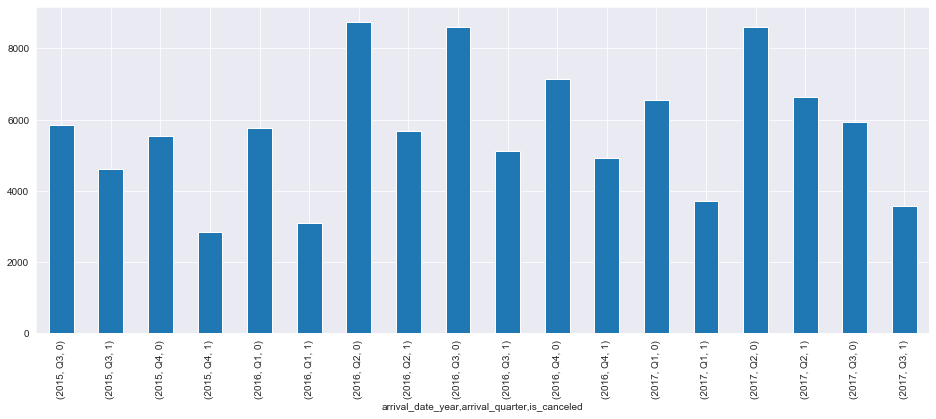

In [36]:
plt.figure(figsize = (16,6))
data.groupby(["arrival_date_year", "arrival_quarter"])["is_canceled"].value_counts().plot.bar()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A673A32A48>],
      dtype=object)

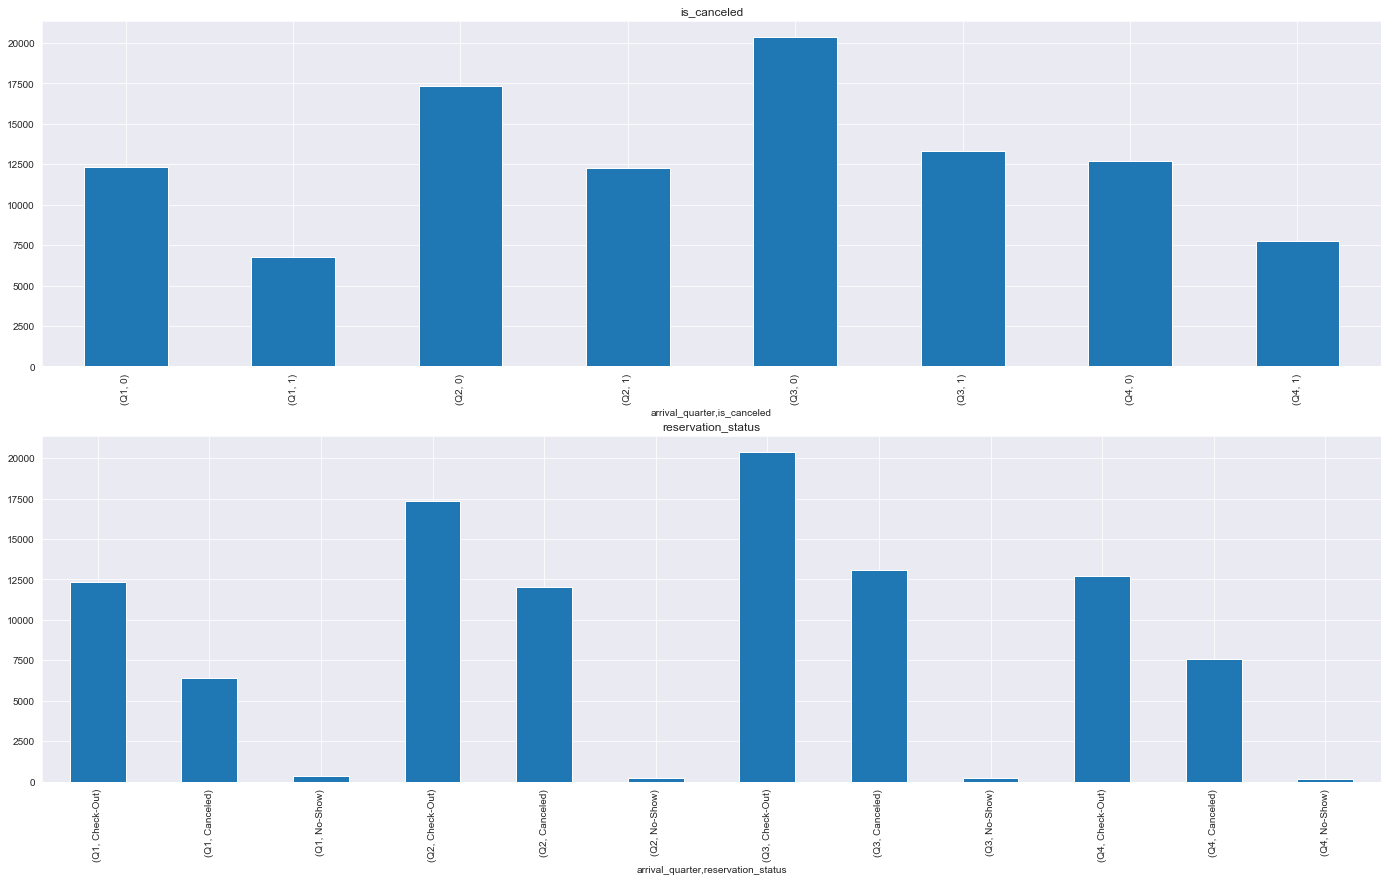

In [37]:
fig,axes = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches((24, 14))
data.groupby( "arrival_quarter")["is_canceled"].value_counts().plot.bar(ax = axes[0], subplots = True)
data.groupby( "arrival_quarter")["reservation_status"].value_counts().plot.bar(ax = axes[1], subplots = True)

In [38]:
data = data.drop(columns = "arrival_date_day_of_month", axis = 1)

##### Vistors Details

In [39]:
vistor_details = ['adults', 'children', 'babies', 'meal', 'country', "customer_type"]

In [40]:
data[['adults', 'children', 'babies', 'meal', 'country', "customer_type"]].describe(include = "all")

,adults,children,babies,meal,country,customer_type
count,102896.000000,102896.000000,102896.000000,102896,102896,102896
unique,NaN,NaN,NaN,5,174,4
top,NaN,NaN,NaN,BB,PRT,Transient
freq,NaN,NaN,NaN,77640,37593,77756
mean,1.899928,0.111248,0.007697,NaN,NaN,NaN
std,0.490886,0.411997,0.097088,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,2.000000,0.000000,0.000000,NaN,NaN,NaN
50%,2.000000,0.000000,0.000000,NaN,NaN,NaN
75%,2.000000,0.000000,0.000000,NaN,NaN,NaN


In [41]:
data[data["adults"] > 2].groupby(["hotel", "arrival_quarter", "customer_type"])[["lead_time", "agent","is_canceled"]].mean()

lead_time       agent  \
hotel        arrival_quarter customer_type                             
City Hotel   Q1              Group              3.000000    8.000000   
                             Transient         53.683995   14.310534   
                             Transient-Party   53.454545   33.030303   
             Q2              Transient         86.828162   12.306285   
                             Transient-Party  135.391892   39.513514   
             Q3              Contract          42.111111   19.000000   
                             Group             85.333333   10.000000   
                             Transient        113.258843   15.401460   
                             Transient-Party  116.769231   19.159763   
             Q4              Contract          11.000000    9.000000   
                             Group             54.666667   28.666667   
                             Transient         98.185468   14.768642   
                             Transient-Party  102.647059   88.058824   
Resort Hotel Q1              Transient         36.130841  223.121495   
                             Transient-Party   78.850000  172.200000   
             Q2              Contract         136.555556  143.444444   
                             Group             28.000000  250.000000   
                             Transient         92.224390  231.575610   
                             Transient-Party  128.411765  269.176471   
             Q3              Contract         184.258065   74.612903   
                             Group            256.666667  106.500000   
                             Transient        114.729951  215.695581   
                             Transient-Party  133.466667  224.866667   
             Q4              Contract          98.500000  184.000000   
                             Group            361.000000   96.000000   
                             Transient         71.052632  212.491228   
                             Transient-Party  103.217391  222.478261   

                                              is_canceled  
hotel        arrival_quarter customer_type                 
City Hotel   Q1              Group               0.000000  
                             Transient           0.402189  
                             Transient-Party     0.060606  
             Q2              Transient           0.428003  
                             Transient-Party     0.027027  
             Q3              Contract            0.333333  
                             Group               0.333333  
                             Transient           0.388546  
                             Transient-Party     0.047337  
             Q4              Contract            0.333333  
                             Group               0.333333  
                             Transient           0.403442  
                             Transient-Party     0.098039  
Resort Hotel Q1              Transient           0.214953  
                             Transient-Party     0.000000  
             Q2              Contract            0.000000  
                             Group               0.000000  
                             Transient           0.404878  
                             Transient-Party     0.117647  
             Q3              Contract            0.096774  
                             Group               0.666667  
                             Transient           0.330606  
                             Transient-Party     0.033333  
             Q4              Contract            0.000000  
                             Group               1.000000  
                             Transient           0.324561  
                             Transient-Party     0.043478

In [42]:
data[data["adults"] > 4]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_quarter
1587,Resort Hotel,1,333,2015,September,36,2,5,26,0.0,...,No Deposit,96.0,0,Group,0.0,0,0,Canceled,2015-01-02,Q3
1752,Resort Hotel,1,340,2015,September,37,2,5,26,0.0,...,No Deposit,96.0,0,Group,0.0,0,0,Canceled,2015-01-02,Q3
1884,Resort Hotel,1,347,2015,September,38,2,5,26,0.0,...,No Deposit,96.0,0,Group,0.0,0,0,Canceled,2015-01-02,Q3
2003,Resort Hotel,1,354,2015,September,39,2,5,26,0.0,...,No Deposit,96.0,0,Group,0.0,0,0,Canceled,2015-01-02,Q3
2164,Resort Hotel,1,361,2015,October,40,2,5,26,0.0,...,No Deposit,96.0,0,Group,0.0,0,0,Canceled,2015-01-02,Q4


* All meetings with more than 4 adults were all cancelled, infact the adults were 26
* The average number of adults that were part of the treat were three
* All bookings made by parents with 4 or more children were cancelled
* Groups books are more likely to be cancelled in this particular area

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A673B50308>],
      dtype=object)

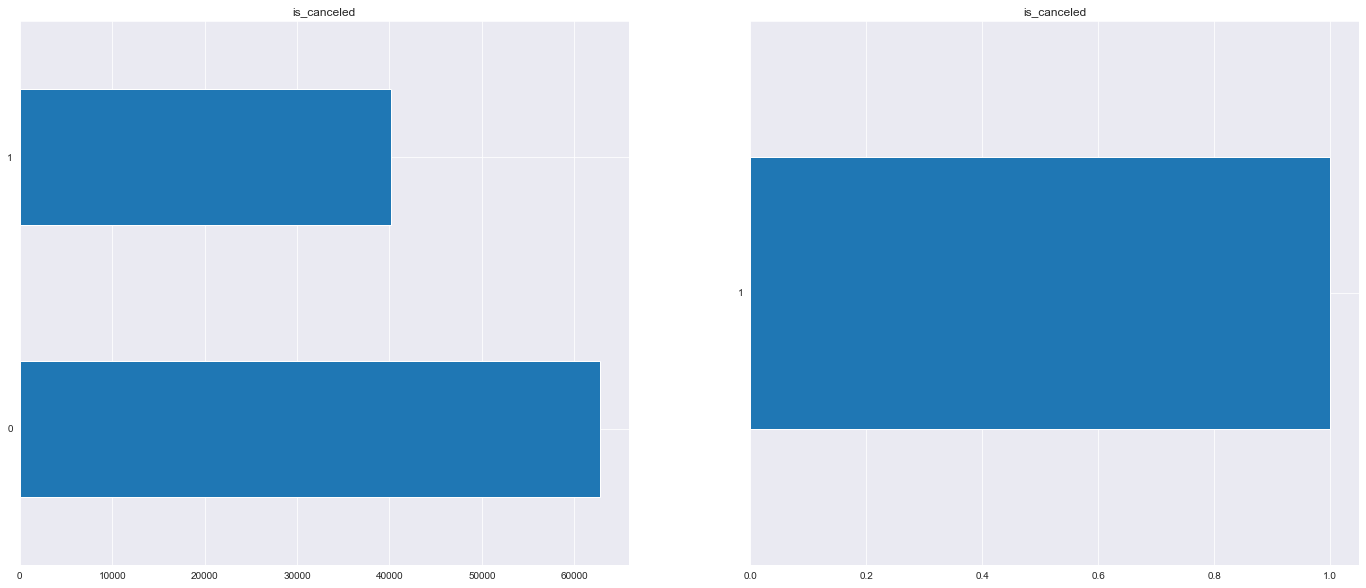

In [43]:
fig,axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches((24, 10))
data[data["children"] <= 3]["is_canceled"].value_counts().plot.barh( ax = axes[0], subplots = True)
data[data["children"] >= 4]["is_canceled"].value_counts().plot.barh(ax = axes[1], subplots = True)

##### Booking Specifics

In [44]:
booking_specs = ['meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date']

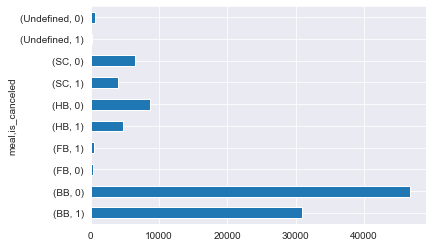

In [45]:
data.groupby("meal")["is_canceled"].value_counts(ascending = True).plot.barh()

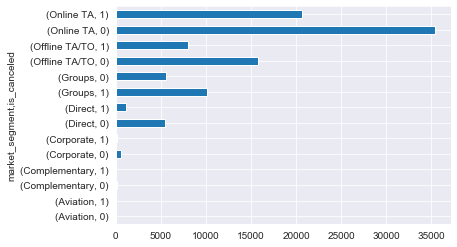

In [46]:
data.groupby("market_segment")["is_canceled"].value_counts().plot.barh()

Most of the people that made bookings in groups canceled their bookings or didn't even show

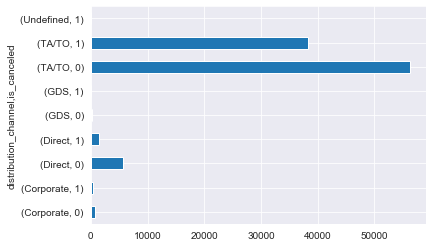

In [47]:
data.groupby("distribution_channel")["is_canceled"].value_counts().plot.barh()

* Majority of the people made their bookings through a Travel Agent or Organisation. Most of these upheld and came to the hotels. The number that cancelled is also considerate (over 35,000 individuals)
* The next group in orders was the people that made direct () contact with the hotel whose graph also reflected the same shape as the ones who booked through travel agents just that most of these customers didn't cancel their bookings
* A large chunk of the people that made their booking directly didn't cancel their bookings

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A678C7E448>],
      dtype=object)

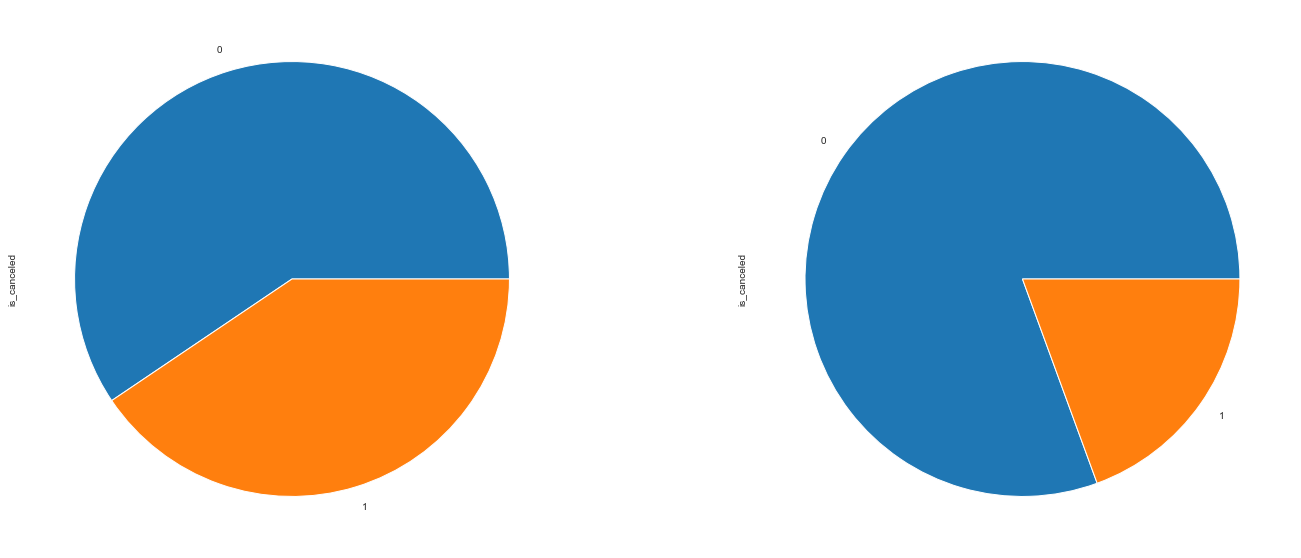

In [48]:
fig,axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches((24, 10))
data[data["distribution_channel"] == "TA/TO"]["is_canceled"].value_counts().plot.pie( ax = axes[0], subplots = True)
data[data["distribution_channel"] == "Direct"]["is_canceled"].value_counts().plot.pie(ax = axes[1], subplots = True )

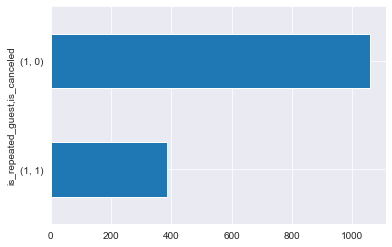

In [49]:
data[data["is_repeated_guest"] == 1].groupby("is_repeated_guest")["is_canceled"].value_counts(ascending = True).plot.barh()

In [50]:
data["is_repeated_guest"].value_counts()

0    101452
1      1444
Name: is_repeated_guest, dtype: int64

* Majority of the repeated guests didnt cancel their bookings. Though the repeated guests form a small number of the guests.
* Most of the repeated guests made bookings through travel agents and travel organisations, they also formed majority of the corporate guests

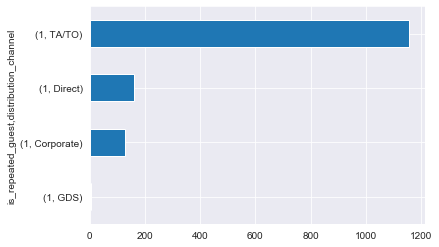

In [51]:
data[data["is_repeated_guest"] == 1].groupby("is_repeated_guest")["distribution_channel"].value_counts(ascending = True).plot.barh()

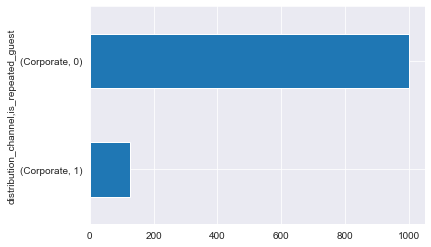

In [52]:
data[data["distribution_channel"] == "Corporate"].groupby("distribution_channel")["is_repeated_guest"].value_counts(ascending = True).plot.barh()

In [53]:
data.groupby("previous_cancellations")["is_canceled"].value_counts()

previous_cancellations  is_canceled
0                       0              62652
                        1              34689
1                       1               5347
                        0                 37
2                       1                 19
                        0                 17
3                       1                  8
                        0                  1
5                       0                  1
6                       1                  6
11                      0                 25
13                      1                  4
14                      1                 14
21                      1                  1
24                      1                 24
25                      1                 25
26                      1                 26
Name: is_canceled, dtype: int64

In [54]:
data[data["previous_cancellations"] >= 1].groupby("previous_cancellations").mean()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
previous_cancellations,,,,,,,,,,,,,,,,,
1,0.993128,219.037147,2015.255572,32.693908,0.733655,2.051263,1.846025,0.013744,0.0013,0.072065,0.066679,0.025074,31.732541,4.7539,78.791068,0.00,0.125000
2,0.527778,106.833333,2015.861111,23.833333,1.027778,2.500000,1.555556,0.055556,0.0000,0.555556,4.805556,0.194444,155.055556,0.0000,67.896111,0.00,1.444444
3,0.888889,203.777778,2015.111111,33.222222,1.333333,3.222222,1.888889,0.000000,0.0000,0.111111,0.111111,0.000000,217.000000,0.0000,70.075556,0.00,0.777778
5,0.000000,7.000000,2016.000000,45.000000,2.000000,6.000000,1.000000,0.000000,0.0000,1.000000,50.000000,0.000000,40.000000,0.0000,65.000000,0.00,0.000000
6,1.000000,113.000000,2016.000000,9.000000,0.000000,3.000000,2.000000,0.000000,0.0000,0.000000,0.000000,0.000000,19.000000,44.0000,75.000000,0.00,0.000000
11,0.000000,3.360000,2016.000000,3.600000,0.320000,1.520000,1.800000,0.000000,0.0000,1.000000,8.640000,0.080000,8.920000,0.0000,82.667600,0.12,0.720000
13,1.000000,190.000000,2016.000000,15.000000,1.000000,1.000000,2.000000,0.000000,0.0000,1.000000,1.000000,0.000000,3.000000,31.0000,70.000000,0.00,0.000000
14,1.000000,265.000000,2015.000000,39.000000,1.000000,3.000000,2.000000,0.000000,0.0000,0.000000,0.000000,0.000000,183.000000,0.0000,89.200000,0.00,0.000000
21,1.000000,265.000000,2015.000000,28.000000,0.000000,2.000000,2.000000,0.000000,0.0000,1.000000,0.000000,0.000000,1.000000,0.0000,62.800000,0.00,0.000000


* Majority of the people who had previously canceled their booking before, canceled again
* Almost all these guests had a large lead time, infact only those who didn't cancel had a very short lead time

In [55]:
data.groupby("previous_bookings_not_canceled")["is_canceled"].value_counts(ascending = True)

previous_bookings_not_canceled  is_canceled
0                               1              40143
                                0              61768
1                               1                 14
                                0                591
2                               1                  2
                                0                143
3                               0                 59
4                               0                 43
5                               0                 38
6                               1                  2
                                0                 20
7                               1                  1
                                0                 11
8                               0                  8
9                               0                  9
10                              1                  1
                                0                  8
11                              0                  3
12

In [56]:
data[data["previous_bookings_not_canceled"] >= 1].groupby("previous_bookings_not_canceled").mean()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
previous_bookings_not_canceled,,,,,,,,,,,,,,,,,
1,0.023140,62.147107,2016.390083,24.872727,0.748760,1.958678,1.623140,0.077686,0.000000,0.699174,0.120661,0.360331,143.998347,1.694215,85.499339,0.161983,0.897521
2,0.013793,30.689655,2016.400000,23.055172,0.531034,1.765517,1.406897,0.062069,0.000000,0.800000,0.062069,0.275862,188.006897,0.000000,70.647517,0.193103,0.896552
3,0.000000,22.118644,2016.474576,21.796610,0.322034,1.423729,1.338983,0.033898,0.016949,0.881356,0.033898,0.288136,190.864407,0.000000,55.947458,0.169492,0.813559
4,0.000000,23.790698,2016.325581,19.837209,0.511628,1.767442,1.395349,0.046512,0.000000,0.906977,1.813953,0.279070,137.186047,1.000000,72.707674,0.232558,1.023256
5,0.000000,12.763158,2016.184211,22.236842,0.342105,1.263158,1.447368,0.052632,0.026316,0.631579,1.473684,0.184211,178.131579,0.000000,60.875789,0.236842,0.631579
6,0.090909,11.681818,2016.409091,27.045455,0.272727,1.318182,1.090909,0.000000,0.000000,0.818182,0.318182,0.227273,147.772727,0.000000,59.993182,0.136364,1.045455
7,0.083333,12.166667,2016.166667,21.916667,0.333333,1.583333,1.416667,0.083333,0.000000,1.000000,0.333333,0.166667,149.000000,0.000000,50.408333,0.250000,1.083333
8,0.000000,1.000000,2016.125000,17.375000,0.250000,0.875000,1.250000,0.000000,0.000000,0.875000,0.375000,0.125000,123.875000,0.000000,48.050000,0.125000,0.125000
9,0.000000,2.555556,2016.333333,15.000000,0.000000,1.111111,1.222222,0.000000,0.000000,1.000000,0.555556,0.000000,130.555556,0.111111,57.356667,0.111111,1.444444


* People who honored their previous bookings had low lead time
* Almost all their present tickets are not cancelled
* Have less than a day in the waiting list

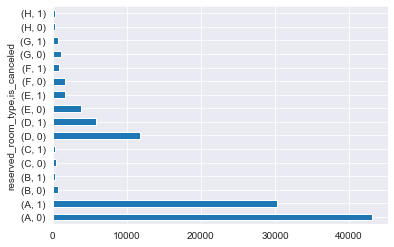

In [57]:
data.groupby("reserved_room_type")["is_canceled"].value_counts().plot.barh()

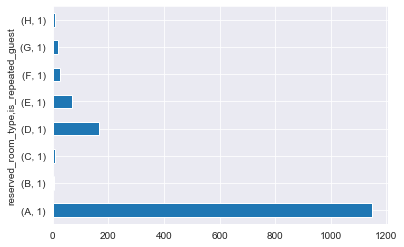

In [58]:
data[data["is_repeated_guest"] == 1].groupby("reserved_room_type")["is_repeated_guest"].value_counts().plot.barh()

* Most of the guests opted for room type A, then D, E, F, G, H in that order, even the repeated guests opted for the same

In [59]:
data.groupby("reserved_room_type")["distribution_channel"].value_counts()

reserved_room_type  distribution_channel
A                   TA/TO                   68790
                    Direct                   3377
                    Corporate                 946
                    GDS                       152
B                   TA/TO                     841
                    Direct                    151
                    Undefined                   2
C                   TA/TO                     555
                    Direct                    210
D                   TA/TO                   16017
                    Direct                   1432
                    Corporate                  74
                    GDS                        12
E                   TA/TO                    4495
                    Direct                    832
                    Corporate                 103
                    GDS                        27
F                   TA/TO                    1956
                    Direct                    580
         

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A678F5D208>],
      dtype=object)

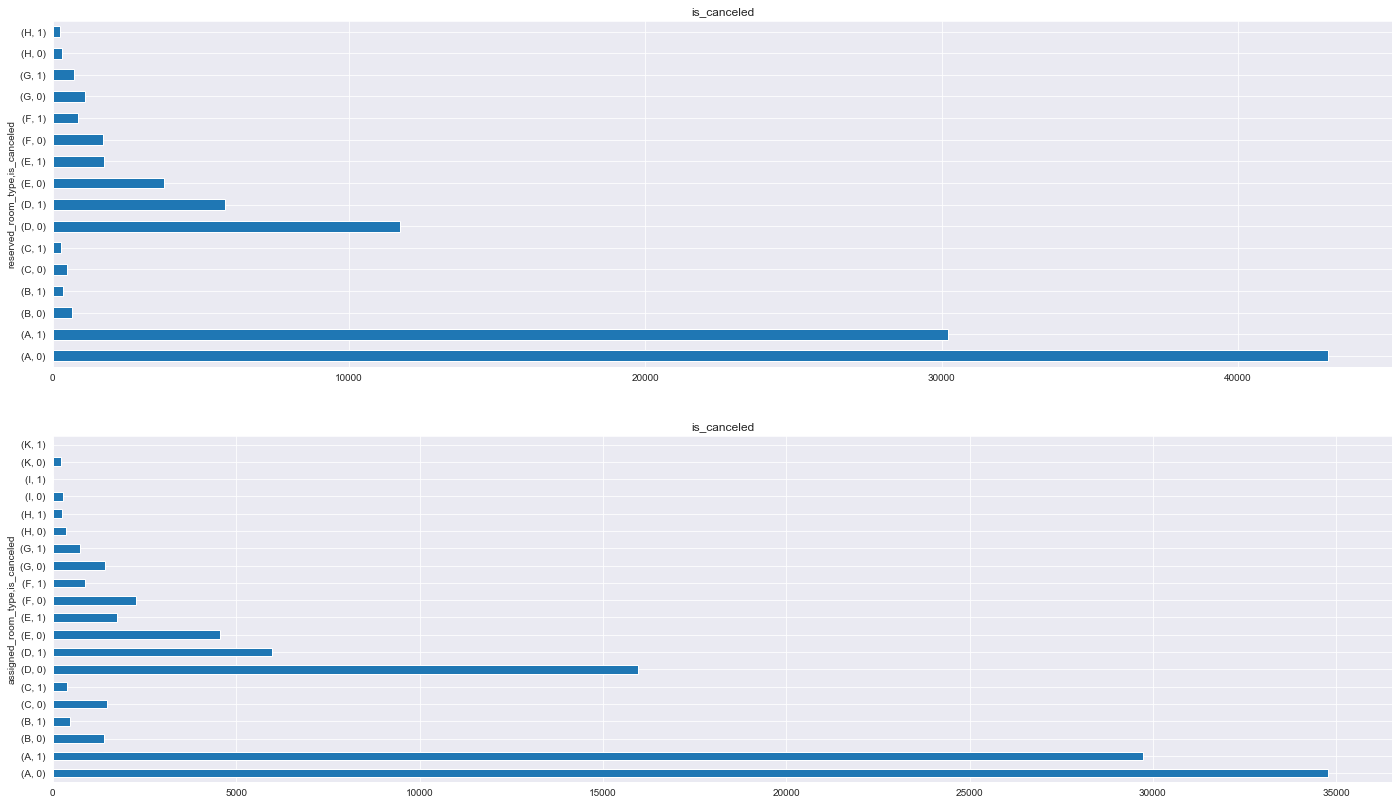

In [60]:
fig,axes = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches((24, 14))
data.groupby("reserved_room_type")["is_canceled"].value_counts().plot.barh(ax = axes[0], subplots = True )
data.groupby("assigned_room_type")["is_canceled"].value_counts().plot.barh(ax = axes[1], subplots = True )

* About 45,000 guests reserved room type A and turned up, of these only 34,000 were reasigned room type A. Of the 31,000 reserved room tye A and later cancelled, 28,000 had been assigned the room
* About 12,000 who honored their booking had reserved room type D, yet about 17,000 were assigned room type D
* None of the guests booked room type K but some of the guests were assigned room type K
* The rest seem consistent with the reservations

In [61]:
data["booking_changes"].value_counts()

0     88647
1     10020
2      3037
3       696
4       286
5        83
6        54
7        26
8        14
9         8
10        6
13        5
14        3
15        3
17        2
12        2
16        2
11        1
18        1
Name: booking_changes, dtype: int64

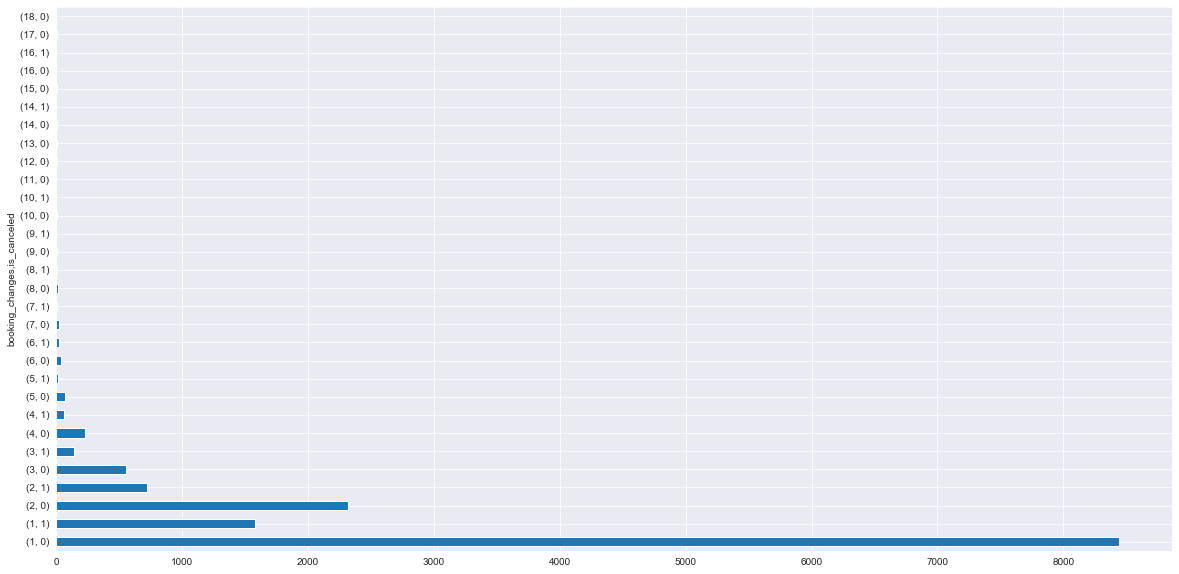

In [62]:
plt.figure(figsize = (20, 10))
data[data["booking_changes"] >= 1].groupby("booking_changes")["is_canceled"].value_counts().plot.barh()

* Majority of the people who made a booking change honored their booking and came to the hotels

In [63]:
data["deposit_type"].value_counts()

No Deposit    90326
Non Refund    12522
Refundable       48
Name: deposit_type, dtype: int64

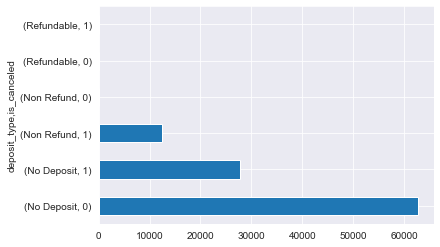

In [64]:
data.groupby("deposit_type")["is_canceled"].value_counts().plot.barh()

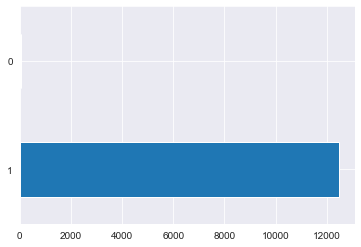

In [65]:
data[data["deposit_type"] == "Non Refund"]["is_canceled"].value_counts().plot.barh()

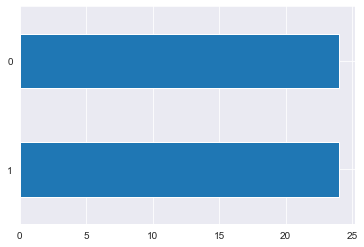

In [66]:
data[data["deposit_type"] == "Refundable"]["is_canceled"].value_counts().plot.barh()

In [67]:
data.groupby("deposit_type").mean()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
deposit_type,,,,,,,,,,,,,,,,,,
No Deposit,0.306346,96.182328,2016.183447,27.266014,1.027788,2.663740,1.907801,0.126641,0.008768,0.015311,0.033213,0.027744,0.228107,90.821181,1.700186,106.967204,0.060392,0.689325
Non Refund,0.995688,223.638077,2015.965022,27.848027,0.618192,2.050711,1.842996,0.000559,0.000000,0.004712,0.394905,0.000080,0.011340,55.296518,9.137119,88.190422,0.000000,0.001278
Refundable,0.500000,192.354167,2016.375000,32.437500,1.541667,3.812500,1.937500,0.020833,0.000000,0.041667,0.000000,0.000000,0.333333,189.625000,32.354167,99.646875,0.041667,0.416667


* Most of the customers made no deposit of bookings
* All the customers who made a booking with no refund attached option canceled their booking, we can't really tell whether it was after payment
* People who booked by Non Refund and Refundable options had quite large lead time averages
* Many of the No Refund types had made previous cancelations

In [68]:
data["agent"].value_counts().head(10)

9.0      31960
240.0    13871
1.0       7191
14.0      3639
7.0       3539
6.0       3283
250.0     2855
241.0     1718
28.0      1666
8.0       1514
Name: agent, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A67A5D2608>],
      dtype=object)

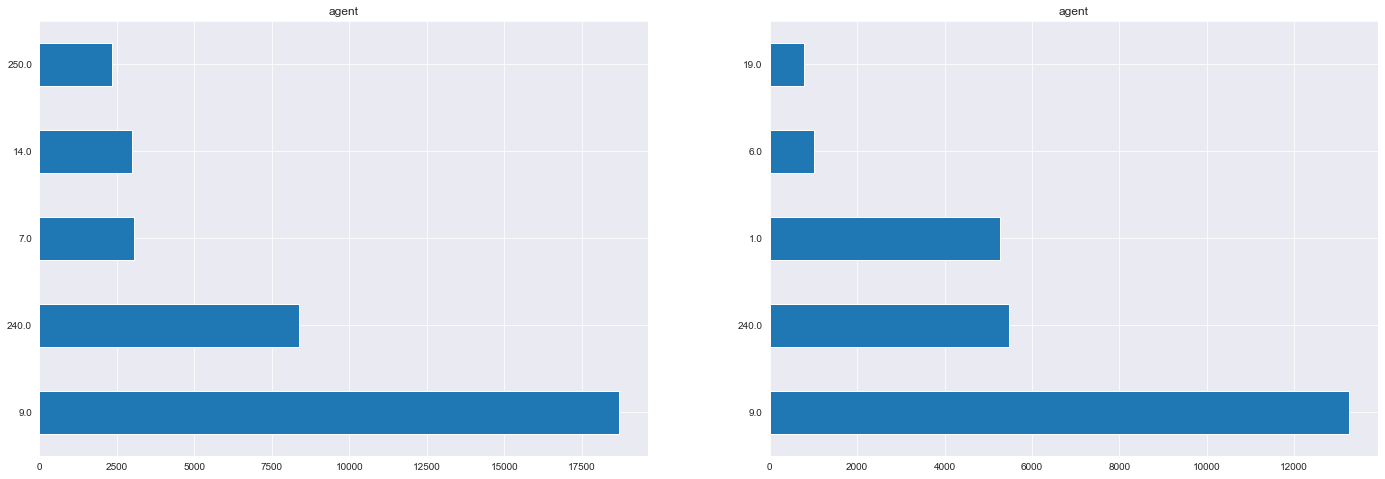

In [69]:
fig,axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches((24, 8))
data[data["is_canceled"] == 0]["agent"].value_counts().head().plot.barh(ax = axes[0], subplots = True)
data[data["is_canceled"] == 1]["agent"].value_counts().head().plot.barh(ax = axes[1], subplots = True)

* Agent 9.0 had the highest number of customers, he had more honored bookings and cancelations than the rest of the agents followed by agent 240
* Agent 1.0, 6.0, 10.0 had more canceled bookings than honors. Agent 1.0 is the one that offered majority of the No Refund bookings that were all almost canceled

In [70]:
data[data["deposit_type"] == "Non Refund"]["agent"].value_counts().head()

1.0     4072
19.0     719
6.0      642
37.0     627
3.0      623
Name: agent, dtype: int64

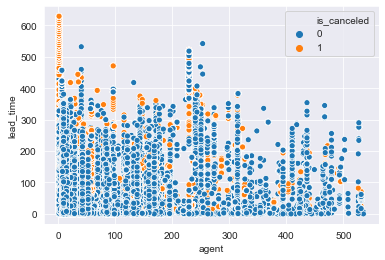

In [71]:
sns.scatterplot(y = data["lead_time"], x = data["agent"], hue = data["is_canceled"], data = data)

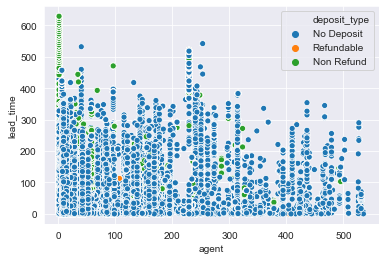

In [72]:
sns.scatterplot(y = data["lead_time"], x = data["agent"], hue = data["deposit_type"], data = data)

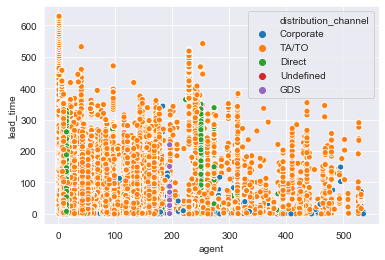

In [73]:
sns.scatterplot(y = data["lead_time"], x = data["agent"], hue = data["distribution_channel"], data = data)

* For most of the dents, the higher the lead time, the greater the chances of being cancelled, Most high lead times for all agents had Non Refund or Refund clause
* Most of the agents work with Travel Agencies, though there agents that work directly with clients and using GDS

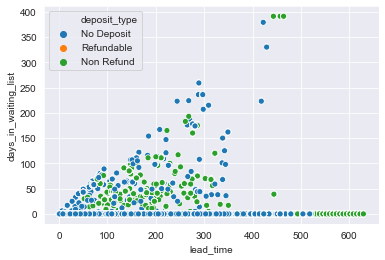

In [74]:
sns.scatterplot(y = data["days_in_waiting_list"], x = data["lead_time"], hue = data["deposit_type"], data = data)

In [75]:
data.groupby("customer_type")["is_canceled"].describe()

,count,mean,std,min,25%,50%,75%,max
customer_type,,,,,,,,
Contract,4063.0,0.310608,0.462799,0.0,0.0,0.0,1.0,1.0
Group,473.0,0.084567,0.278530,0.0,0.0,0.0,0.0,1.0
Transient,77756.0,0.429665,0.495031,0.0,0.0,0.0,1.0,1.0
Transient-Party,20604.0,0.264609,0.441135,0.0,0.0,0.0,1.0,1.0


* Most of the guests in these hotels are transient

In [76]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_quarter'],
      dtype='object')

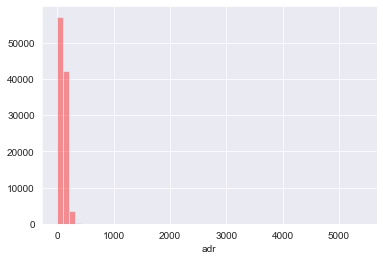

In [77]:
sns.distplot(data["adr"], kde = False, color = "r")

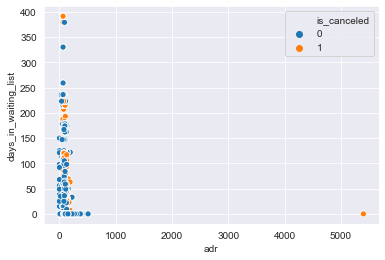

In [78]:
sns.scatterplot(x = data["adr"], y = data["days_in_waiting_list"], hue = data["is_canceled"], data = data)

The adr column, has an outlier at 5400, so we will delete this value, and see what happens to out analysis

In [79]:
data = data[data["adr"] < 5000]

In [80]:
data.shape

(102895, 31)

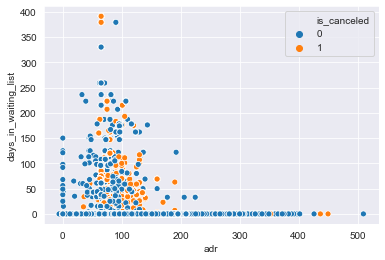

In [81]:
sns.scatterplot(x = data["adr"], y = data["days_in_waiting_list"], hue = data["is_canceled"], data = data)

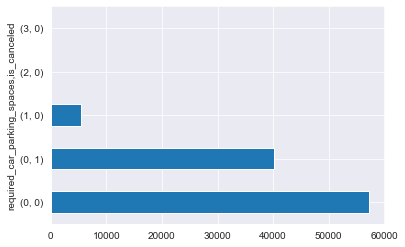

In [82]:
data.groupby("required_car_parking_spaces")["is_canceled"].value_counts().plot.barh()

In [83]:
data["required_car_parking_spaces"].value_counts()

0    97464
1     5408
2       20
3        3
Name: required_car_parking_spaces, dtype: int64

* Majority of the cusomers didn't require parking spaces
* All customers who were keen on parking spaces honored their reservations

In [84]:
data.groupby("total_of_special_requests")["is_canceled"].value_counts()

total_of_special_requests  is_canceled
0                          1              29884
                           0              28071
1                          0              23375
                           1               7068
2                          0               9207
                           1               2757
3                          0               1807
                           1                425
4                          0                244
                           1                 28
5                          0                 29
Name: is_canceled, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A678A322C8>],
      dtype=object)

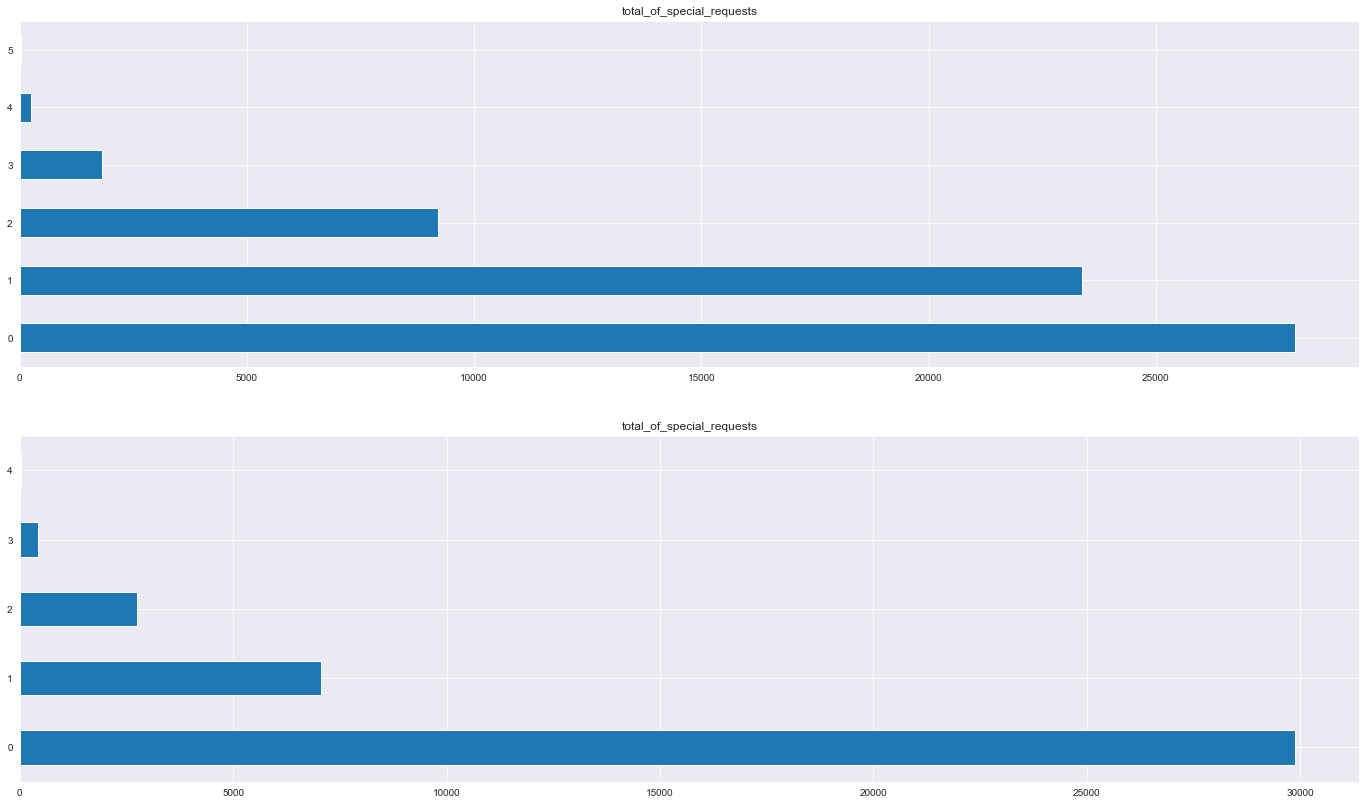

In [85]:
fig,axes = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches((24, 14))
data[data["is_canceled"] == 0]["total_of_special_requests"].value_counts().plot.barh(ax = axes[0], subplots = True)
data[data["is_canceled"] == 1]["total_of_special_requests"].value_counts().plot.barh(ax = axes[1], subplots = True)

* Majority of the people had one or no special request
* Many of the people that had only one or more special requests also honored their booking
* All the people that had five special requests honored their booking

In [86]:
data[data["total_of_special_requests"] == 4][["customer_type", "is_repeated_guest", "reserved_room_type"]].describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_type,272,4,Transient,238,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_repeated_guest,272,NaN,NaN,NaN,0.0625,0.242508,0,0,0,0,1
reserved_room_type,272,8,A,131,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
data.groupby("reservation_status")["is_canceled"].value_counts()

reservation_status  is_canceled
Canceled            1              39159
Check-Out           0              62733
No-Show             1               1003
Name: is_canceled, dtype: int64

In [88]:
data.groupby("reservation_status")[["agent", "lead_time"]].describe()

agent                                                \
                      count       mean         std  min  25%   50%    75%   
reservation_status                                                          
Canceled            39159.0  75.240685  104.775795  1.0  9.0   9.0  154.0   
Check-Out           62733.0  93.804011  113.854047  1.0  9.0  14.0  240.0   
No-Show              1003.0  73.848455   98.422675  3.0  9.0  14.0  134.0   

                          lead_time                                            \
                      max     count        mean         std  min   25%    50%   
reservation_status                                                              
Canceled            531.0   39159.0  151.252432  119.878131  0.0  54.0  121.0   
Check-Out           535.0   62733.0   87.817162   91.600142  0.0  15.0   57.0   
No-Show             531.0    1003.0   65.235294   69.109682  0.0   9.0   38.0   

                                  
                      75%    max  
reservation_status                
Canceled            224.0  629.0  
Check-Out           135.0  542.0  
No-Show             116.0  385.0

In [89]:
data.groupby("reservation_status")[['reserved_room_type',
       'assigned_room_type', 'booking_changes']].describe(include = "all").T

reservation_status          Canceled Check-Out   No-Show
reserved_room_type count       39159     62733      1003
                   unique          8         8         8
                   top             A         A         A
                   freq        29491     43055       718
                   mean          NaN       NaN       NaN
                   std           NaN       NaN       NaN
                   min           NaN       NaN       NaN
                   25%           NaN       NaN       NaN
                   50%           NaN       NaN       NaN
                   75%           NaN       NaN       NaN
                   max           NaN       NaN       NaN
assigned_room_type count       39159     62733      1003
                   unique         10        10        10
                   top             A         A         A
                   freq        29120     34783       598
                   mean          NaN       NaN       NaN
                   std           NaN       NaN       NaN
                   min           NaN       NaN       NaN
                   25%           NaN       NaN       NaN
                   50%           NaN       NaN       NaN
                   75%           NaN       NaN       NaN
                   max           NaN       NaN       NaN
booking_changes    count       39159     62733      1003
                   unique        NaN       NaN       NaN
                   top           NaN       NaN       NaN
                   freq          NaN       NaN       NaN
                   mean    0.0961209  0.267642  0.206381
                   std      0.452341  0.703992  0.611173
                   min             0         0         0
                   25%             0         0         0
                   50%             0         0         0
                   75%             0         0         0
                   max            16        18         6

* Majority of the customers (62,733) hnored their reservation
* Majority of the agents, accross all numbers had their clients honor bookings
* Using the third quartile in the lead time column, the higher lead times caused so much cancelation of bookings
* The number of people who had chosen room A reduced on the day they were expected especially among those that came to the hotel

In [90]:
canceled = data[data["reservation_status"] == "Canceled"]["agent"].value_counts().head()
Check_out = data[data["reservation_status"] == "Check-Out"]["agent"].value_counts().head()
No_Show = data[data["reservation_status"] == "No-Show"]["agent"].value_counts().head()

In [91]:
print("... Top Agents with Cancelations ....","\n", canceled, "\n")
print("... Top Agents with Check_outs ....","\n", Check_out, "\n")
print("... Top Agents with No Shows ....","\n", No_Show, "\n")

... Top Agents with Cancelations .... 
 9.0      12891
240.0     5383
1.0       5280
6.0       1012
19.0       779
Name: agent, dtype: int64 

... Top Agents with Check_outs .... 
 9.0      18696
240.0     8387
7.0       3065
14.0      2987
250.0     2342
Name: agent, dtype: int64 

... Top Agents with No Shows .... 
 9.0      373
240.0    101
14.0      86
28.0      57
134.0     53
Name: agent, dtype: int64 



* Agent 9.0 leads all lists, followed by 240 and these are high because they approached many clients

In [92]:
canceled_1 = data[data["reservation_status"] == "Canceled"]["customer_type"].value_counts().head()
Check_out_1 = data[data["reservation_status"] == "Check-Out"]["customer_type"].value_counts().head()
No_Show_1 = data[data["reservation_status"] == "No-Show"]["customer_type"].value_counts().head()

In [93]:
print("... Top Customer Types with Cancelations ....","\n", canceled_1, "\n")
print("... Top Customer Types with Check_outs ....","\n", Check_out_1, "\n")
print("... Top Customer Types with No Shows ....","\n", No_Show_1, "\n")

... Top Customer Types with Cancelations .... 
 Transient          32620
Transient-Party     5267
Contract            1236
Group                 36
Name: customer_type, dtype: int64 

... Top Customer Types with Check_outs .... 
 Transient          44347
Transient-Party    15152
Contract            2801
Group                433
Name: customer_type, dtype: int64 

... Top Customer Types with No Shows .... 
 Transient          788
Transient-Party    185
Contract            26
Group                4
Name: customer_type, dtype: int64 



In [94]:
honored = data[data["is_canceled"] == 0]

In [95]:
canceled = data[data["is_canceled"] == 1]

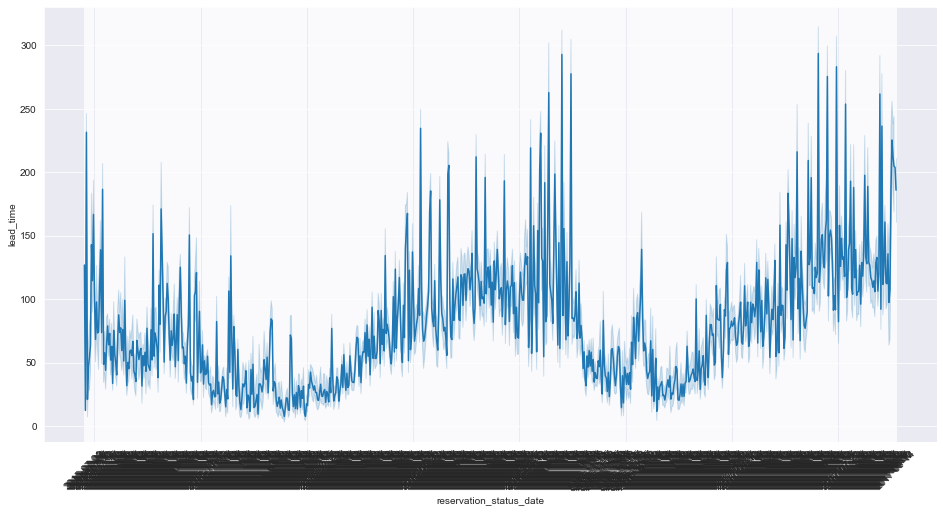

In [96]:
plt.figure(figsize = (16, 8))
sns.lineplot(x = honored["reservation_status_date"], y = honored["lead_time"], data = honored)
plt.xticks(rotation = 45)
plt.show()

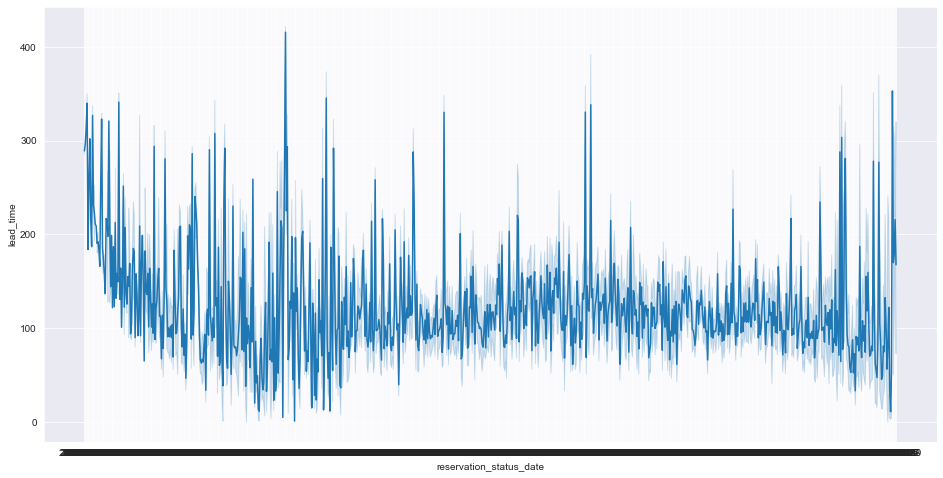

In [97]:
plt.figure(figsize = (16, 8))
sns.lineplot(x = canceled["reservation_status_date"], y = canceled["lead_time"], data = canceled)

* Most of the honored lead times are below 100
* There a few spikes into the very high lead times for the honored compared to the total per cartegory

Since we have looked at all the relations, we are now going to convert all data into numericals and run a correlation, which we will use to adjust on the size of the columns and make a choice on the datasets for modeling

In [98]:
df = data

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102895 entries, 3 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           102895 non-null  object 
 1   is_canceled                     102895 non-null  int64  
 2   lead_time                       102895 non-null  int64  
 3   arrival_date_year               102895 non-null  int64  
 4   arrival_date_month              102895 non-null  object 
 5   arrival_date_week_number        102895 non-null  int64  
 6   stays_in_weekend_nights         102895 non-null  int64  
 7   stays_in_week_nights            102895 non-null  int64  
 8   adults                          102895 non-null  int64  
 9   children                        102895 non-null  float64
 10  babies                          102895 non-null  int64  
 11  meal                            102895 non-null  object 
 12  country         

In [100]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_quarter'],
      dtype='object')

In [101]:
non_numerical_columns = ["hotel", "arrival_date_month", 'meal', 
                         'country', 'market_segment', 'distribution_channel',
                        'reserved_room_type',
       'assigned_room_type', 'customer_type',
                        'reservation_status', 'reservation_status_date', 
                        'arrival_quarter']

Creating functions

In [102]:
def hotels(array):
    if array == "City Hotel":
        return 0
    else:
        return 1

In [103]:
df["hotel"] = df["hotel"].apply(hotels)

In [104]:
def months(array):
    monthly = ["January", "February", "March", "April", 
               "May", "June", "July", "August", "September", "October",
        "November", "December"]
    for u in range(len(monthly)):
        if array == monthly[u]:
            return u
        else:
            pass

In [105]:
df["arrival_date_month"] = df["arrival_date_month"].apply(months)

In [106]:
def meals(array):
    if array == "BB":
        return 0
    elif array == "HB":
        return 1
    elif array == "SC":
        return 2
    elif array == "FB":
        return 3
    else:
        return 4
    

In [107]:
df["meal"] = df["meal"].apply(meals)

In [108]:
def market(val):
    if val == "Online TA":
        return 0
    elif val == "Offline TA/TO":
        return 1
    elif val == "Groups":
        return 2
    elif val == "Direct":
        return 3
    elif val == "Corporate":
        return 4
    elif val == "Complementary":
        return 5
    else:
        return 6

In [109]:
df["market_segment"] = df["market_segment"].apply(market)

In [110]:
def channel(val):
    if val == "TA/TO":
        return 0
    elif val == "Direct":
        return 1
    elif val == "Corporate":
        return 2
    elif val == "GDS":
        return 3
    else:
        return 4

In [111]:
df["distribution_channel"] = df["distribution_channel"].apply(channel)

In [112]:
def room(val):
    list_a = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K"]
    for i in range(len(list_a)):
        if val == list_a[i]:
            return i
        else:
            pass

In [113]:
df["reserved_room_type"] = df["reserved_room_type"].apply(room)

In [114]:
df["assigned_room_type"] = df["assigned_room_type"].apply(room)

In [115]:
def customer(array):
    if array == "Transient":
        return 0
    elif array == "Transient-Party":
        return 1
    elif array == "Contract":
        return 2
    else:
        return 3

In [116]:
df["customer_type"] = df["customer_type"].apply(customer)

In [117]:
def reserve(array):
    if array == "Check-Out":
        return 0
    elif array == "Canceled":
        return 1
    else:
        return 2

In [118]:
df["reservation_status"] = df["reservation_status"].apply(reserve)

In [119]:
def deposit(array):
    if array == "No Deposit":
        return 0
    elif array == "Non Refund":
        return 1
    else:
        return 2

In [120]:
df["deposit_type"] = df["deposit_type"].apply(deposit)

In [121]:
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])

In [122]:
def a_quarter(array):
    quarter = ["Q3", "Q2", "Q4", "Q1"]
    for q in range(len(quarter)):
        if array == quarter[q]:
            return q
        else:
            pass

In [123]:
df["arrival_quarter"] = df["arrival_quarter"].apply(a_quarter)

In [124]:
df["country"].unique()

array(['GBR', 'PRT', 'USA', 'ESP', 'IRL', 'ROU', 'NOR', 'OMN', 'ARG',
       'POL', 'DEU', 'FRA', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'DNK',
       'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ', 'BWA',
       'LUX', 'NLD', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR', 'ZAF',
       'CYM', 'ZMB', 'ZWE', 'DZA', 'KOR', 'CRI', 'HUN', 'ARE', 'TUN',
       'JAM', 'HRV', 'HKG', 'ISR', 'IRN', 'GEO', 'AND', 'GIB', 'URY',
       'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT', 'NGA', 'MDV', 'VEN',
       'SVK', 'AGO', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN', 'PHL', 'SEN',
       'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD', 'MYS', 'ARM',
       'JPN', 'LKA', 'CUB', 'CMR', 'MUS', 'COM', 'SUR', 'UGA', 'BGR',
       'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU', 'VNM', 'PLW', 'QAT',
       'EGY', 'PER', 'MLT', 'MWI', 'ISL', 'ECU', 'NPL', 'CPV', 'BHS',
       'MAC', 'TGO', 'TWN', 'DJI', 'KNA', 'ETH', 'IRQ', 'HND', 'RWA',
       'KHM', 'MCO', 

In [125]:
def nation(array):
    nations = ['GBR', 'PRT', 'USA', 'ESP', 'IRL', 'ROU', 'NOR', 'OMN', 'ARG',
       'POL', 'DEU', 'FRA', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'DNK',
       'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ', 'BWA',
       'LUX', 'NLD', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR', 'ZAF',
       'CYM', 'ZMB', 'ZWE', 'DZA', 'KOR', 'CRI', 'HUN', 'ARE', 'TUN',
       'JAM', 'HRV', 'HKG', 'ISR', 'IRN', 'GEO', 'AND', 'GIB', 'URY',
       'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT', 'NGA', 'MDV', 'VEN',
       'SVK', 'AGO', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN', 'PHL', 'SEN',
       'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD', 'MYS', 'ARM',
       'JPN', 'LKA', 'CUB', 'CMR', 'MUS', 'COM', 'SUR', 'UGA', 'BGR',
       'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU', 'VNM', 'PLW', 'QAT',
       'EGY', 'PER', 'MLT', 'MWI', 'ISL', 'ECU', 'NPL', 'CPV', 'BHS',
       'MAC', 'TGO', 'TWN', 'DJI', 'KNA', 'ETH', 'IRQ', 'HND', 'RWA',
       'KHM', 'MCO', 'BGD', 'UZB', 'IMN', 'TJK', 'NIC', 'BEN', 'VGB',
       'TZA', 'GAB', 'BIH', 'GHA', 'TMP', 'GLP', 'KEN', 'LIE', 'GNB',
       'MNE', 'UMI', 'MYT', 'FRO', 'MMR', 'PAN', 'BFA', 'LBY', 'MLI',
       'NAM', 'BOL', 'PRY', 'BRB', 'ABW', 'AIA', 'SLV', 'DMA', 'PYF',
       'GUY', 'LCA', 'ATA', 'GTM', 'ASM', 'MRT', 'NCL', 'KIR', 'SDN',
       'ATF', 'SLE', 'LAO']
    for n in range(len(nations)):
        if array == nations[n]:
            return n
        else:
            pass

In [126]:
df["country"] = df["country"].apply(nation)

In [127]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_quarter
3,1,0,13,2015,6,27,0,1,1,0.0,...,0,304.0,0,0,75.0,0,0,0,2015-07-02,0
4,1,0,14,2015,6,27,0,2,2,0.0,...,0,240.0,0,0,98.0,0,1,0,2015-07-03,0
5,1,0,14,2015,6,27,0,2,2,0.0,...,0,240.0,0,0,98.0,0,1,0,2015-07-03,0
7,1,0,9,2015,6,27,0,2,2,0.0,...,0,303.0,0,0,103.0,0,1,0,2015-07-03,0
8,1,1,85,2015,6,27,0,3,2,0.0,...,0,240.0,0,0,82.0,0,1,1,2015-05-06,0


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102895 entries, 3 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           102895 non-null  int64         
 1   is_canceled                     102895 non-null  int64         
 2   lead_time                       102895 non-null  int64         
 3   arrival_date_year               102895 non-null  int64         
 4   arrival_date_month              102895 non-null  int64         
 5   arrival_date_week_number        102895 non-null  int64         
 6   stays_in_weekend_nights         102895 non-null  int64         
 7   stays_in_week_nights            102895 non-null  int64         
 8   adults                          102895 non-null  int64         
 9   children                        102895 non-null  float64       
 10  babies                          102895 non-null  int64  

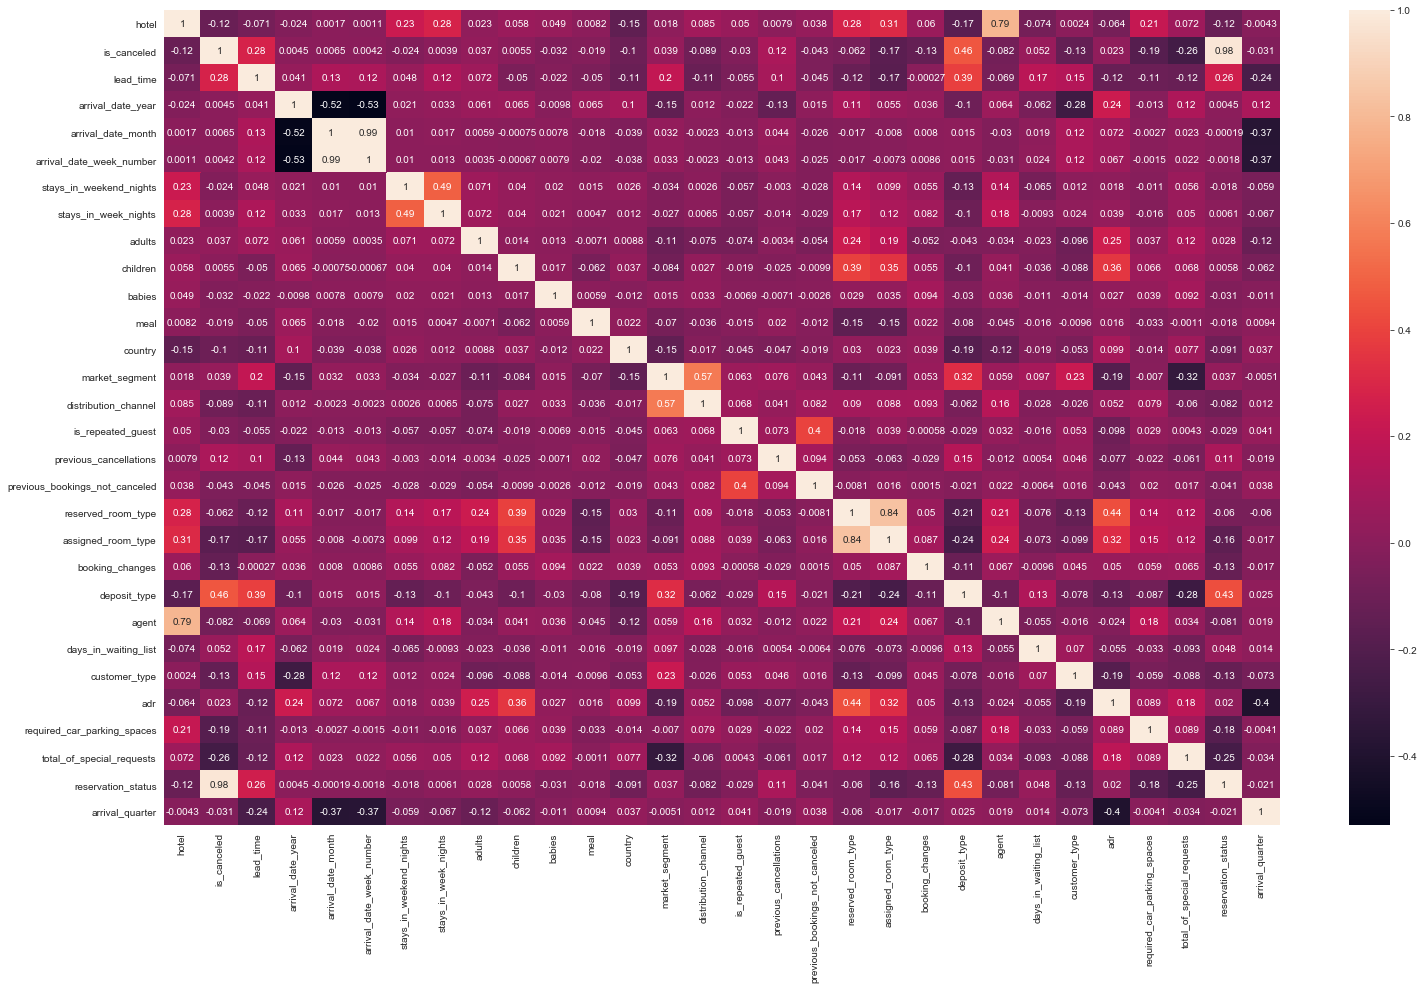

In [129]:
corr = df.corr()
plt.figure(figsize = (25,15))
sns.heatmap(corr, annot = True)
df.columns
plt.show()

In [130]:
corr = df.corr()

In [131]:
corr

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,arrival_quarter
hotel,1.000000,-0.116244,-0.070851,-0.023891,0.001745,0.001073,0.231976,0.280010,0.023437,0.058133,...,0.059655,-0.166416,0.790230,-0.074328,0.002400,-0.064172,0.213979,0.072139,-0.115122,-0.004327
is_canceled,-0.116244,1.000000,0.277647,0.004523,0.006483,0.004195,-0.023576,0.003940,0.037059,0.005464,...,-0.131738,0.459045,-0.081946,0.052473,-0.130604,0.023272,-0.188299,-0.257911,0.981517,-0.031075
lead_time,-0.070851,0.277647,1.000000,0.041111,0.125211,0.120139,0.047667,0.124179,0.072474,-0.049838,...,-0.000266,0.386042,-0.068744,0.170352,0.146967,-0.118533,-0.111222,-0.123061,0.257611,-0.235473
arrival_date_year,-0.023891,0.004523,0.041111,1.000000,-0.516970,-0.530390,0.020689,0.032788,0.061351,0.065320,...,0.036480,-0.099534,0.063703,-0.061736,-0.276645,0.235511,-0.012857,0.121470,0.004536,0.115043
arrival_date_month,0.001745,0.006483,0.125211,-0.516970,1.000000,0.994838,0.010496,0.016668,0.005928,-0.000746,...,0.007992,0.014973,-0.030343,0.019379,0.118755,0.071796,-0.002726,0.023454,-0.000193,-0.372768
arrival_date_week_number,0.001073,0.004195,0.120139,-0.530390,0.994838,1.000000,0.010105,0.013207,0.003500,-0.000673,...,0.008562,0.015269,-0.031005,0.023820,0.118057,0.067450,-0.001481,0.021634,-0.001842,-0.367123
stays_in_weekend_nights,0.231976,-0.023576,0.047667,0.020689,0.010496,0.010105,1.000000,0.486352,0.070999,0.039957,...,0.054705,-0.130847,0.141378,-0.064611,0.012435,0.018271,-0.011039,0.056102,-0.018361,-0.059421
stays_in_week_nights,0.280010,0.003940,0.124179,0.032788,0.016668,0.013207,0.486352,1.000000,0.071893,0.039938,...,0.081606,-0.102629,0.183268,-0.009333,0.024340,0.039322,-0.016380,0.050316,0.006121,-0.066681
adults,0.023437,0.037059,0.072474,0.061351,0.005928,0.003500,0.070999,0.071893,1.000000,0.014394,...,-0.051999,-0.042634,-0.034490,-0.022945,-0.096496,0.250938,0.036907,0.116796,0.027885,-0.117561
children,0.058133,0.005464,-0.049838,0.065320,-0.000746,-0.000673,0.039957,0.039938,0.014394,1.000000,...,0.055311,-0.099867,0.041210,-0.036459,-0.087562,0.355872,0.065517,0.068146,0.005761,-0.061679


* The correlations are so many that it's hard to select the features to use for modeling, so for that purpose we will use the principle component analysis to choose the features for use upon the targets
* The data has two targets (reservation status and is canceled) henceforth, I will create a datset with each as a target separately then carry out a principal component analysis and then, I will use each of them as a feature and later all the data sets to see the effect of feature selection and engineering on the model

##### is_canceled

In [132]:
label_1 = df["is_canceled"]
features_1 = df.drop(columns = ["is_canceled", "reservation_status", "reservation_status_date"], axis = 1)

In [133]:
features_1.shape

(102895, 28)

In [134]:
from sklearn.decomposition import PCA

In [135]:
from sklearn.preprocessing import StandardScaler

In [136]:
scaler = StandardScaler()
scaler.fit(features_1)
features_1_scaled = scaler.transform(features_1)

In [137]:
pca = PCA(n_components=3)
fit = pca.fit(features_1_scaled)
print("Explained Variance: %s", fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: %s [0.11843754 0.09550885 0.07890455]
[[ 2.64594376e-01 -1.80220430e-01  1.78713858e-01 -9.69395618e-02
  -9.81968203e-02  1.55018671e-01  1.62410168e-01  1.49299254e-01
   2.45969085e-01  4.76301354e-02 -3.82801410e-02  6.43615308e-02
  -1.80594634e-01  4.01712497e-02 -1.70631266e-02 -9.22955291e-02
  -3.93667091e-03  4.27067190e-01  4.10428579e-01  8.00408037e-02
  -2.66794644e-01  2.32803207e-01 -1.16424091e-01 -1.48913829e-01
   2.85910561e-01  1.49752133e-01  1.97898710e-01 -2.67899424e-02]
 [ 1.22659169e-01  1.28757221e-01 -3.72989697e-01  5.45294260e-01
   5.45838398e-01  9.16321421e-02  1.08519783e-01  5.37849634e-02
   6.48468815e-02  2.58052736e-02 -6.06636047e-02 -8.27982706e-02
   9.05239495e-02  4.59882834e-02 -1.63300892e-02  6.32725216e-02
  -2.76516739e-02  1.08888430e-01  1.07254061e-01  3.68398984e-02
   7.91332051e-03  7.98969868e-02  2.33728696e-02  1.48353214e-01
   1.02369253e-01  4.16196837e-02  4.37115373e-04 -3.37968423e-01]
 [ 4.16034494e-0

Text(0, 0.5, 'Principal components')

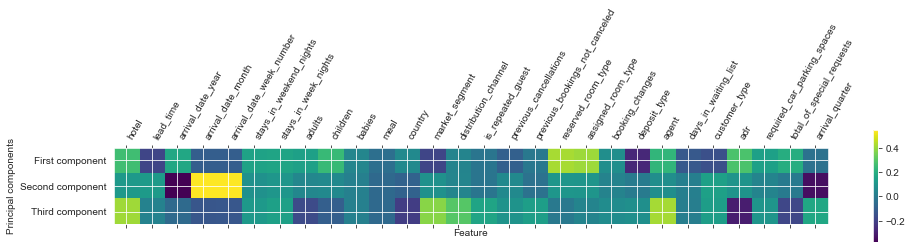

In [138]:
plt.matshow(fit.components_, cmap='viridis')
plt.yticks([0, 1, 2], ["First component", "Second component", "Third component"])
plt.colorbar()
plt.xticks(range(len(features_1.columns)), features_1.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

From the above PCA analysis, since the first component is the most important, we will use it this time around. From the first compoent, we chose only features that have a value greater than +0.15/-0.15

In [139]:
removed_components = ['arrival_date_year', 'arrival_date_month', 'adults',
                     'babies', 'meal', 'country', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list',
           'customer_type', 'required_car_parking_spaces', 'total_of_special_requests',
       'arrival_quarter']

In [140]:
principle_features_1 = features_1.drop(columns = removed_components, axis = 1)

In [141]:
from sklearn.model_selection import train_test_split

In [159]:
X_train, X_test, y_train, y_test = train_test_split(principle_features_1, label_1, test_size = 0.2)

In [143]:
from sklearn.preprocessing import StandardScaler

In [160]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

In [145]:
from sklearn.svm import SVC

In [161]:
support_vector_classifier = SVC(kernel='rbf')
support_vector_classifier.fit(X_train,y_train)
y_pred_svr = support_vector_classifier.predict(X_test)

In [147]:
from sklearn.metrics import confusion_matrix

In [162]:
cm_support_vector_classifier = confusion_matrix(y_test,y_pred_svr)
print(cm_support_vector_classifier,end='\n\n')

[[11963   513]
 [ 4578  3525]]



In [163]:
numerator = cm_support_vector_classifier[0][0] + cm_support_vector_classifier[1][1]

In [164]:
denominator = sum(cm_support_vector_classifier[0]) + sum(cm_support_vector_classifier[1])

In [165]:
acc_svc = (numerator/denominator) * 100

In [166]:
print("Accuracy : ",round(acc_svc,2),"%")

Accuracy :  75.26 %
